In [9]:
# Question 2: Logistic Regression
!pip install -U pandas
!pip install -U numpy
!pip install -U plotly==5.10.0

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

dataset = np.genfromtxt('../data/q2/q2test.csv', delimiter=',')

x1 = dataset[1:, 0].reshape(-1,1)
x2 = dataset[1:, 1].reshape(-1,1)
x0 = np.ones((x1.shape))
x_test = np.append(x0, x1, axis=1)
x_test = np.append(x_test, x2, axis=1)
y_test = dataset[1:, 2].reshape(-1,1)

n = x_test.shape[0]

In [10]:
#Question 2.a - Sample million of points

#Data points given
data_points= 1000000
#Intercept term
x0 = np.ones((data_points,1)) 

#Samples
x1 = np.random.normal(3, 2, data_points).reshape(-1,1)
x2 = np.random.normal(-1, 2, data_points).reshape(-1,1)

#Create matrix
x = np.append(x0,x1,axis=1)
x = np.append(x, x2, axis=1)

#Sample epsilon error
eps = np.random.normal(0, np.sqrt(2), data_points).reshape(-1,1)

theta = np.array([[3], [1], [2]])

#Generate the value of Y (given X, parameterized by given Theta)
y = x.dot(theta) + eps

#Shuffle data
temp = np.append(x, y, axis=1)
np.random.shuffle(temp)

x = temp[:,0:3]
y = temp[:,-1:]

In [11]:
#Question 2.b - Apply Stochastic gradient descent
import time

alpha = 0.001  

# Prediction function: h(θ) = x^Tθ 
def predict(x, theta):
    return x.dot(theta)

# Cost function: J(θ) = 1/2m * Σ(y-h(θ))^2
def cost(x,y,theta, m):
    return (1/(2*m)) * np.sum((y - predict(x,theta))**2)

cost_0 = cost(x, y, theta, data_points)
print(f"Initial Cost:{cost_0}")


def cost_grd(x, y, theta, m):
    return (1/m) * (np.zeros((3,1))+  x.T.dot(x.dot(theta)-y))


# Stochastic descent function
def stochastic_gradient_descent(x, y, theta, alpha, r, batches, threshold=10e-7):
    
    start = time.time()
    theta = np.zeros((3,1))
    i=0
    c, c_avg = 0.0, np.array([cost(x[0], y[0], theta, 1)])
    theta_hist = theta

    while True:
        i+=1
        count = 0
        c_init = cost(x, y,theta, data_points)
        
        for b in batches:
            c += cost(b[0], b[1], theta, r)
            
            check = 10000 if r==1 else 100 if r==100 else 10 if r==10000 else 1
            if(count%check == 0 and count!=0):
                c /= check
                c_avg = np.append(c_avg, c)
                c=0.0
            
            theta -= alpha * cost_grd(b[0], b[1], theta, r)
            theta_hist = np.append(theta_hist,theta,axis=1)
            count +=1
        
        c_final = cost(x, y, theta, data_points)
        if (abs(c_final - c_init) < threshold):
            break
    
    end = time.time()
        

    return theta, c_final, theta_hist, i, end-start



values = []
b_size = np.array([1, 100, 10000, 1000000])
for r in b_size:
    #number of batches
    batches = [(x[i:i+r,:], y[i:i+r]) for i in range(0, data_points, r)]
    theta, c_final, theta_hist, iterations, t = stochastic_gradient_descent(x, y, theta, alpha, r, batches)
    print(f'Cost of the model is {c_final} with {iterations} iterations and {t} s')
    values.append((theta, c_final, theta_hist, iterations, t, r))



print(values)

Initial Cost value for the hypothesis with zero parameters=0.9988631536701088
Current average cost = 1.3831709613391472
Current average cost = 1.0034598505437309
Current average cost = 1.001464722682587
Current average cost = 0.992682944458443
Current average cost = 1.0175031988249814
Current average cost = 1.0181529341090403
Current average cost = 1.0036527024785624
Current average cost = 0.9910871524892501
Current average cost = 0.9759062449691411
Current average cost = 1.0136237670564734
Current average cost = 0.9971916923523395
Current average cost = 1.0192075197430581
Current average cost = 1.007549454170458
Current average cost = 1.0304133259297377
Current average cost = 1.0225402044517948
Current average cost = 1.007894321446737
Current average cost = 1.004918327297367
Current average cost = 1.020263607421452
Current average cost = 1.0109685725290827
Current average cost = 1.0154836738641722
Current average cost = 1.0154317005738847
Current average cost = 1.016831225531778
Curre

In [12]:
err_og = cost(x_test, y_test, np.array([[3],[1],[2]]), n)
print(f"Original Test Error:{err_og}")

for value in values:
    (theta, c_final, theta_hist, iterations, time, r) = value
    err_new = cost(x_test, y_test, theta, n)
    print(f"Test error learned: {err_new} with r: {r}")

    print(f"Difference: {err_new-err_og} with r: {r}")

The Test error on Original Hypothesis with theta = 0 is = 0.9829469215
The Test error on Learned Hypothesis = 1.1665294847119572, , for r = 1
The difference in the test error of original and learned hypothesis is = 0.1835825632119572, for r = 1
The Test error on Learned Hypothesis = 0.983837158548581, , for r = 100
The difference in the test error of original and learned hypothesis is = 0.000890237048581044, for r = 100
The Test error on Learned Hypothesis = 0.9832436233590488, , for r = 10000
The difference in the test error of original and learned hypothesis is = 0.0002967018590488424, for r = 10000
The Test error on Learned Hypothesis = 1.0174952791590102, , for r = 1000000
The difference in the test error of original and learned hypothesis is = 0.03454835765901021, for r = 1000000


[[2.98253243]
 [1.03542041]
 [1.9526828 ]]


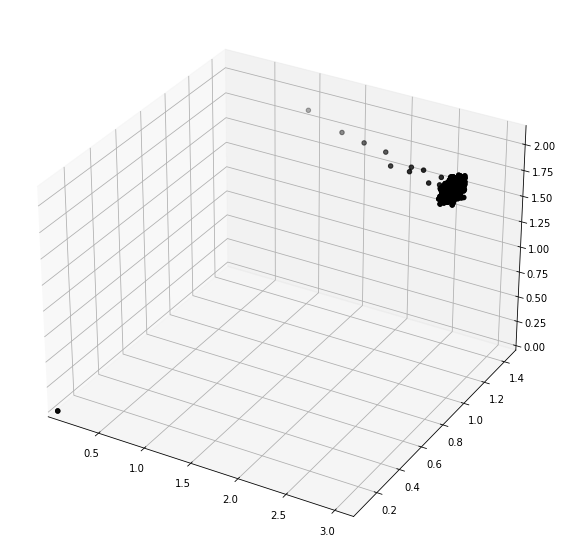

In [42]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

(theta, c_final, theta_hist, iterations, time, r) = values[0]
print(theta)
t = theta_hist.T[::100,:]
step = 10
ax.set_xlim(np.amin(t[:,0]), np.amax(t[:,0]))
ax.set_ylim(np.amin(t[:,1]), np.amax(t[:,1]))
ax.set_zlim(np.amin(t[:,2]), np.amax(t[:,2]))
sc = ax.scatter([], [], [])
x_, y_, z_ = [], [], []

def animate(i):
    x_.append(t[i,0])
    y_.append(t[i,1])
    z_.append(t[i,2])
    sc._offsets3d = (x_, y_, z_)
    return sc

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q2_1c.gif', writer='pillow')

File written successfully
[[3.00189627]
 [0.99801062]
 [1.99770664]]


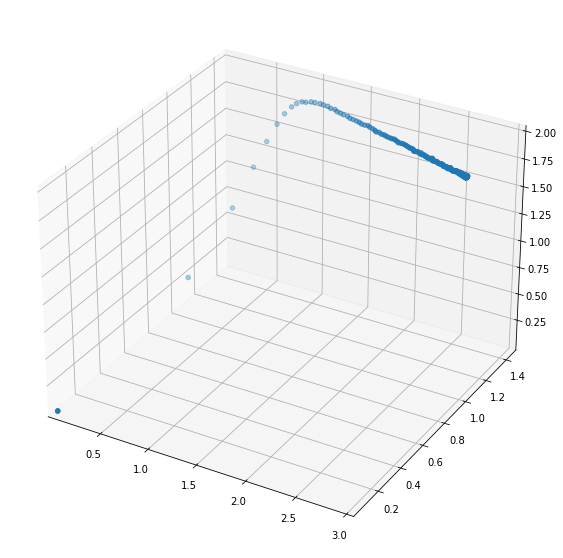

In [46]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

(theta, c_final, theta_hist, iterations, time, r) = values[1]
predictions = predict(x_test, theta)
with open('results.txt', 'w+') as f:
    for item in predictions:
        f.write('%s\n' %item[0])
     
    print("File written successfully")
f.close()
t =  theta_hist.T[0::10,:]
print(theta)
ax.set_xlim(np.amin(t[:,0]), np.amax(t[:,0]))
ax.set_ylim(np.amin(t[:,1]), np.amax(t[:,1]))
ax.set_zlim(np.amin(t[:,2]), np.amax(t[:,2]))
sc = ax.scatter([], [], [])
x_, y_, z_ = [], [], []

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q2_100c.gif', writer='pillow')


[[2.99121302]
 [1.00110481]
 [1.99882841]]


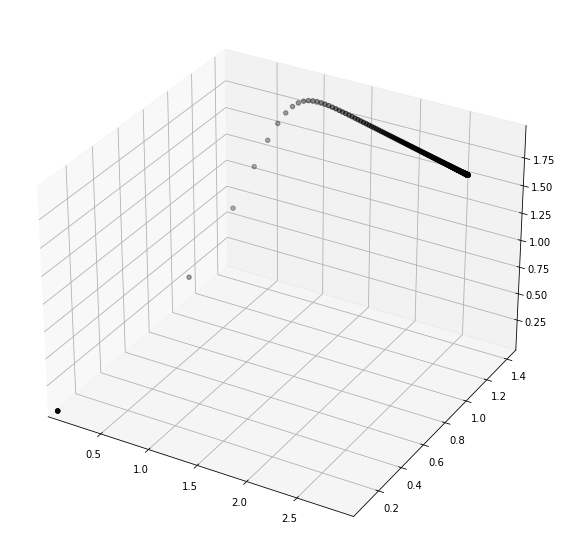

In [44]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

(theta, c_final, theta_hist, iterations, time, r) = values[2]
t = theta_hist.T[0::10,:]
print(theta)
ax.set_xlim(np.amin(t[:,0]), np.amax(t[:,0]))
ax.set_ylim(np.amin(t[:,1]), np.amax(t[:,1]))
ax.set_zlim(np.amin(t[:,2]), np.amax(t[:,2]))
sc = ax.scatter([], [], [])
x_, y_, z_ = [], [], []

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q2_10000c.gif', writer='pillow')


[[2.88902918]
 [1.02353158]
 [1.99151893]]


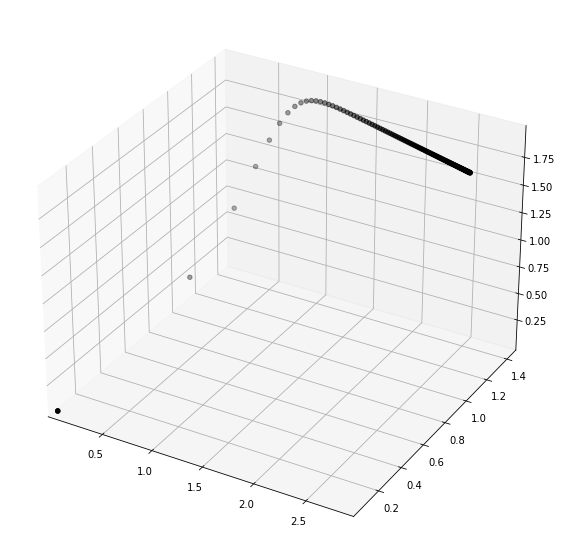

In [45]:
from matplotlib.animation import FuncAnimation

    
#Plot Graph
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

(theta, c_final, theta_hist, iterations, time, r) = values[3]
t = theta_hist.T[0::10,:] 
print(theta)
ax.set_xlim(np.amin(t[:,0]), np.amax(t[:,0]))
ax.set_ylim(np.amin(t[:,1]), np.amax(t[:,1]))
ax.set_zlim(np.amin(t[:,2]), np.amax(t[:,2]))
sc = ax.scatter([], [], [])
x_, y_, z_ = [], [], []

anim = FuncAnimation(fig, animate, frames=np.arange(0, t.shape[0], step), interval=200, repeat_delay=3000, blit=False)
anim.save('q2_1000000c.gif', writer='pillow')